## SEIS 764-01 Assignment 2
**Jamie Boehme**

Import libraries for processing.

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

Read in data from Github repo

In [2]:
url = 'https://raw.githubusercontent.com/jamieboehme/Artificial-Intelligence/main/CellDNA.csv'
df = pd.read_csv(url, header=None)

Do some quick exploration of the dataset

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,222,31.189189,40.342342,35.579087,8.883917,0.968325,-80.113673,222,1,16.812471,0.816176,0.578125,78.591,0
1,73,29.493151,271.397260,15.517202,6.407490,0.910764,76.042946,73,1,9.640876,0.858824,0.608333,39.217,0
2,256,58.816406,289.941406,37.226013,9.863895,0.964256,85.324742,256,1,18.054067,0.752941,0.562637,89.111,0
3,126,71.023810,477.412698,13.112980,12.790672,0.220351,63.523477,126,1,12.666025,0.881119,0.646154,43.832,0
4,225,90.808889,541.946667,44.463110,7.858879,0.984256,-52.874983,225,1,16.925688,0.728155,0.252525,90.072,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212,216,738.527778,216.449074,38.229761,9.556174,0.968254,12.847813,216,1,16.583719,0.640950,0.397059,98.589,0
1213,328,748.896341,47.664634,63.138991,9.101974,0.989555,57.919494,328,1,20.435816,0.607407,0.205257,131.431,8
1214,97,761.690722,207.288660,22.751513,8.230351,0.932275,-24.674618,97,1,11.113246,0.591463,0.384921,67.427,0
1215,223,770.654708,235.502242,53.491654,8.643053,0.986860,73.244715,223,1,16.850294,0.557500,0.252834,112.656,0


In [4]:
df.columns = ['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','Target']
df.shape

(1217, 14)

In [5]:
df.dtypes

V1          int64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8          int64
V9          int64
V10       float64
V11       float64
V12       float64
V13       float64
Target      int64
dtype: object

In [6]:
df.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
Target    0
dtype: int64

Transform target variable into those that are interesting (have values greater than 0) and those that are not interesting.

In [7]:
new_target = df.loc[:,'Target']
new_target = pd.DataFrame(new_target)
new_target.loc[new_target.Target > 0, 'Target'] = 1

In [8]:
new_target

,Target
0,0
1,0
2,0
3,0
4,1
...,...
1212,0
1213,1
1214,0
1215,0


In [9]:
y = new_target.values.ravel()

In [10]:
x = df.iloc[:,0:13]

Standardize training variables

In [11]:
ZX= preprocessing.scale(x)
x = pd.DataFrame(ZX)
print(x, '\n')
print(x.mean(axis=0), 
x.std(axis=0))

            0         1         2         3         4         5         6   \
0     0.159528 -1.802006 -1.208134  0.114420 -0.135689  0.538311 -1.587426   
1    -0.939212 -1.809877  0.424363 -0.933511 -0.817247  0.019258  1.500586   
2     0.410247 -1.673790  0.555385  0.200447  0.134019  0.501621  1.684134   
3    -0.548385 -1.617137  1.879947 -1.059096  0.939523 -6.206504  1.253012   
4     0.181650 -1.525316  2.335905  0.578476 -0.417798  0.681969 -1.048779   
...        ...       ...       ...       ...       ...       ...       ...   
1212  0.115283  1.480684  0.036132  0.252878  0.049329  0.537678  0.250896   
1213  0.941181  1.528803 -1.156399  1.554010 -0.075675  0.729753  1.142193   
1214 -0.762234  1.588181 -0.028590 -0.555628 -0.315562  0.213238 -0.491114   
1215  0.166902  1.629782  0.170750  1.050082 -0.201979  0.705453  1.445251   
1216 -0.835975  1.603325  0.383793 -1.040983 -0.235315 -1.213681  0.364560   

            7         8         9         10        11        1

Split the dataset into training and test data for modeling

In [12]:
x_train,x_test,y_train,y_test= train_test_split(ZX, y, test_size=0.25, random_state=110)

Begin NN modeling on Cell Analysis data

In [13]:
model = Sequential()
model.add(Dense(units = 10, input_dim=13, activation = 'relu'))
model.add(Dense(units = 6, activation = 'relu')) #more layers = more training necessary -> so increased epochs
model.add(Dense(units = 2, activation = 'softmax')) 

In [14]:
y_train = utils.to_categorical(y_train,2)

In [15]:
adam = Adam(learning_rate=0.1)
model.compile(loss='binary_crossentropy',  metrics=['accuracy']) 
#removed optimizer adam from model as the model was learning too fast: Could remove optimizer or decrease initial learning rate.
history=model.fit(x_train, y_train, validation_split=0.33, epochs=50, batch_size=4, verbose=1) 

Epoch 1/50
153/153 [==============================] - 2s 8ms/step - loss: 0.5966 - accuracy: 0.7643 - val_loss: 0.5031 - val_accuracy: 0.8638
Epoch 2/50
153/153 [==============================] - 1s 6ms/step - loss: 0.4081 - accuracy: 0.8773 - val_loss: 0.3612 - val_accuracy: 0.8505
Epoch 3/50
153/153 [==============================] - 1s 5ms/step - loss: 0.3092 - accuracy: 0.8789 - val_loss: 0.3106 - val_accuracy: 0.8671
Epoch 4/50
153/153 [==============================] - 1s 4ms/step - loss: 0.2718 - accuracy: 0.8985 - val_loss: 0.2834 - val_accuracy: 0.8970
Epoch 5/50
153/153 [==============================] - 1s 4ms/step - loss: 0.2501 - accuracy: 0.9083 - val_loss: 0.2679 - val_accuracy: 0.9070
Epoch 6/50
153/153 [==============================] - 1s 6ms/step - loss: 0.2343 - accuracy: 0.9083 - val_loss: 0.2496 - val_accuracy: 0.9169
Epoch 7/50
153/153 [==============================] - 1s 4ms/step - loss: 0.2227 - accuracy: 0.9133 - val_loss: 0.2364 - val_accuracy: 0.9136
Epoch 

Question 1: Print architectural layers of model

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                140       
                                                                 
 dense_1 (Dense)             (None, 6)                 66        
                                                                 
 dense_2 (Dense)             (None, 2)                 14        
                                                                 
Total params: 220
Trainable params: 220
Non-trainable params: 0
_________________________________________________________________


Obtain overall accuracy score

In [17]:
train_scores = model.evaluate(x_train, y_train)

29/29 [==============================] - 0s 1ms/step - loss: 0.1661 - accuracy: 0.9287


Evaluate training of model over epoch

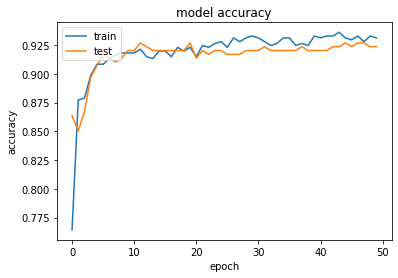

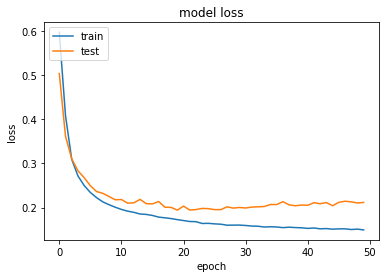

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy') 
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.xlabel('epoch')
plt.show()

Question 2: Print classification report on testing data
- overall accuracy = ~90%

In [19]:
y_pred_prob = model.predict(x_test)
y_pred_class = np.argmax(y_pred_prob, axis = 1) 
accuracy_score(y_test,y_pred_class)
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       258
           1       0.63      0.77      0.69        47

    accuracy                           0.90       305
   macro avg       0.79      0.84      0.81       305
weighted avg       0.91      0.90      0.90       305



Question 2: Print classification report on training data
- overall accuracy: ~93%

In [20]:
#perform classification report on train data
y_pred_prob = model.predict(x_train)
y_pred_class = np.argmax(y_pred_prob, axis = 1) # put some logic on max numpy function argmax
y_pred_class = utils.to_categorical(y_pred_class,2)
accuracy_score(y_train,y_pred_class)
print(classification_report(y_train,y_pred_class))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       759
           1       0.79      0.78      0.79       153

   micro avg       0.93      0.93      0.93       912
   macro avg       0.87      0.87      0.87       912
weighted avg       0.93      0.93      0.93       912
 samples avg       0.93      0.93      0.93       912

